In [3]:
import time
import copy
import glob

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [125]:
# Data augmentation and normalization for training
# Just normalization for validation

transform = transforms.Compose([
            transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])


data_dir = '/content/drive/MyDrive/data/train'
train_dataset = torchvision.datasets.ImageFolder(data_dir, transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)

dataset_size = len(train_dataset)
class_names = train_dataset.classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [71]:
train_dataset[50]

(tensor([[[-0.4739, -0.7822, -0.3712,  ...,  0.1597, -0.2342, -0.0116],
          [-0.5938, -0.6794, -0.4568,  ..., -0.0629, -0.3712, -0.1828],
          [-0.4911, -0.4397, -0.3198,  ..., -0.0629, -0.1314, -0.3027],
          ...,
          [-0.9363, -0.8507, -0.7137,  ...,  0.1426,  0.2453,  0.1083],
          [-0.6965, -0.7479, -0.4739,  ...,  0.0569,  0.2282,  0.1426],
          [-0.7137, -0.6281, -0.6452,  ...,  0.1426,  0.2453,  0.2796]],
 
         [[-0.3550, -0.6702, -0.2500,  ...,  0.2927, -0.1099,  0.1176],
          [-0.4776, -0.5651, -0.3375,  ...,  0.0651, -0.2500, -0.0574],
          [-0.3725, -0.3200, -0.1975,  ...,  0.0651, -0.0049, -0.1800],
          ...,
          [-0.8277, -0.7402, -0.6001,  ...,  0.2752,  0.3803,  0.2402],
          [-0.5826, -0.6352, -0.3550,  ...,  0.1877,  0.3627,  0.2752],
          [-0.6001, -0.5126, -0.5301,  ...,  0.2752,  0.3803,  0.4153]],
 
         [[-0.1312, -0.4450, -0.0267,  ...,  0.5136,  0.1128,  0.3393],
          [-0.2532, -0.3404,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([128, 3, 224, 224])
tensor(2)


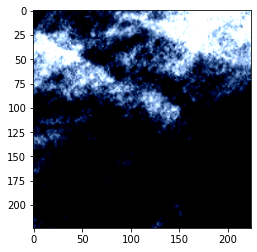

In [72]:
batch = next(iter(train_loader))
print(batch[0].shape)
plt.imshow(batch[0][0].permute(1, 2, 0))
print(batch[1][0])


In [119]:
vgg16 = models.vgg16(pretrained=True)

In [97]:
resnet18 = models.resnet18(pretrained=True)

In [120]:
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [98]:
print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [116]:
for inputs, labels in train_loader:
  print(labels)

tensor([1, 2, 0, 3, 4, 1, 4, 0, 3, 2, 1, 2, 1, 2, 2, 4, 4, 2, 0, 4, 3, 4, 1, 3,
        4, 4, 0, 1, 0, 4, 2, 3, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 2, 2, 2, 2, 4,
        3, 0, 0, 4, 0, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 3, 0, 4, 1, 3, 0, 4,
        0, 1, 2, 1, 0, 2, 0, 3, 3, 0, 4, 4, 1, 2, 0, 4, 3, 0, 4, 4, 0, 3, 3, 2,
        0, 0, 3, 3, 2, 2, 2, 2, 4, 0, 3, 3, 3, 1, 3, 1, 4, 1, 4, 0, 4, 4, 4, 4,
        4, 3, 0, 4, 2, 1, 1, 4])
tensor([1, 2, 4, 4, 2, 0, 4, 1, 4, 0, 2, 0, 3, 0, 3, 0, 2, 1, 4, 2, 2, 4, 1, 2,
        3, 2, 3, 4, 0, 4, 3, 0, 0, 4, 3, 4, 1, 2, 2, 1, 4, 2, 4, 4, 2, 0, 2, 1,
        2, 4, 2, 0, 2, 0, 3, 2, 3, 3, 3, 0, 4, 0, 4, 0, 0, 4, 0, 2, 1, 0, 4, 3,
        2, 2, 4, 0, 3, 2, 1, 4, 3, 4, 2, 4, 0, 3, 1, 3, 3, 0, 4, 3, 2, 2, 4, 4,
        1, 2, 0, 4, 0, 2, 4, 2, 4, 3, 0, 3, 4, 4, 4, 2, 4, 0, 3, 4, 0, 3, 1, 3,
        0, 0, 4, 2, 1, 3, 4, 2])
tensor([0, 4, 2, 4, 3, 3, 3, 4, 0, 0, 0, 2, 3, 3, 1, 0, 0, 3, 0, 2, 0, 2, 0, 0,
        3, 3, 4, 4, 2, 3, 0, 0, 0, 0, 0, 1, 2, 4, 0, 0

# # Feature Extracting a Pretrained Model

Since this pretrained model is trained on ImageNet dataset, the output layers has 1000 nodes. We want to reshape this last classifier layer to fit this dataset which has 2 classes. Furthermore, in feature extracting, we don't need to calculate gradient for any layers except the last layer that we initialize. For this we need to set `.requires_grad` to `False`

In [117]:
def set_parameter_requires_grad(model, feature_extracting=True):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False
            
set_parameter_requires_grad(vgg16)

In [118]:
vgg16.fc = nn.Linear(4096, 5)

In [101]:
# Initialize new output layer
resnet18.fc = nn.Linear(512, 5)

In [121]:
for name, param in vgg16.named_parameters():
    if param.requires_grad:
        print(name, param.data)

features.0.weight tensor([[[[-5.5373e-01,  1.4270e-01,  5.2896e-01],
          [-5.8312e-01,  3.5655e-01,  7.6566e-01],
          [-6.9022e-01, -4.8019e-02,  4.8409e-01]],

         [[ 1.7548e-01,  9.8630e-03, -8.1413e-02],
          [ 4.4089e-02, -7.0323e-02, -2.6035e-01],
          [ 1.3239e-01, -1.7279e-01, -1.3226e-01]],

         [[ 3.1303e-01, -1.6591e-01, -4.2752e-01],
          [ 4.7519e-01, -8.2677e-02, -4.8700e-01],
          [ 6.3203e-01,  1.9308e-02, -2.7753e-01]]],


        [[[ 2.3254e-01,  1.2666e-01,  1.8605e-01],
          [-4.2805e-01, -2.4349e-01,  2.4628e-01],
          [-2.5066e-01,  1.4177e-01, -5.4864e-03]],

         [[-1.4076e-01, -2.1903e-01,  1.5041e-01],
          [-8.4127e-01, -3.5176e-01,  5.6398e-01],
          [-2.4194e-01,  5.1928e-01,  5.3915e-01]],

         [[-3.1432e-01, -3.7048e-01, -1.3094e-01],
          [-4.7144e-01, -1.5503e-01,  3.4589e-01],
          [ 5.4384e-02,  5.8683e-01,  4.9580e-01]]],


        [[[ 1.7715e-01,  5.2149e-01,  9.8740e-03

In [103]:
# Check which layer in the model that will compute the gradient
for name, param in resnet18.named_parameters():
    if param.requires_grad:
        print(name, param.data)

conv1.weight tensor([[[[-1.0419e-02, -6.1356e-03, -1.8098e-03,  ...,  5.6615e-02,
            1.7083e-02, -1.2694e-02],
          [ 1.1083e-02,  9.5276e-03, -1.0993e-01,  ..., -2.7124e-01,
           -1.2907e-01,  3.7424e-03],
          [-6.9434e-03,  5.9089e-02,  2.9548e-01,  ...,  5.1972e-01,
            2.5632e-01,  6.3573e-02],
          ...,
          [-2.7535e-02,  1.6045e-02,  7.2595e-02,  ..., -3.3285e-01,
           -4.2058e-01, -2.5781e-01],
          [ 3.0613e-02,  4.0960e-02,  6.2850e-02,  ...,  4.1384e-01,
            3.9359e-01,  1.6606e-01],
          [-1.3736e-02, -3.6746e-03, -2.4084e-02,  ..., -1.5070e-01,
           -8.2230e-02, -5.7828e-03]],

         [[-1.1397e-02, -2.6619e-02, -3.4641e-02,  ...,  3.2521e-02,
            6.6221e-04, -2.5743e-02],
          [ 4.5687e-02,  3.3603e-02, -1.0453e-01,  ..., -3.1253e-01,
           -1.6051e-01, -1.2826e-03],
          [-8.3730e-04,  9.8420e-02,  4.0210e-01,  ...,  7.0789e-01,
            3.6887e-01,  1.2455e-01],
       

In [122]:
def train_model(model, dataloaders, criterion, optimizer, device, num_epochs=50, is_train=True):
    since = time.time()
    
    acc_history = []
    loss_history = []

    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        running_loss = 0.0
        running_corrects = 0

        # Iterate over data.
        for inputs, labels in dataloaders:
            inputs = inputs.to(device)
            labels = labels.to(device)
            model.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            _, preds = torch.max(outputs, 1)

            # backward
            loss.backward()
            optimizer.step()

            # statistics
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / len(dataloaders.dataset)
        epoch_acc = running_corrects.double() / len(dataloaders.dataset)

        print('Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))

        if epoch_acc > best_acc:
            best_acc = epoch_acc

        acc_history.append(epoch_acc.item())
        loss_history.append(epoch_loss)
        
        torch.save(model.state_dict(), os.path.join('drive/MyDrive/data/model/', '{0:0=2d}.pth'.format(epoch)))

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Acc: {:4f}'.format(best_acc))
    
    return acc_history, loss_history

In [123]:
params_to_update = []
for name,param in vgg16.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)
            
optimizer = optim.Adam(params_to_update)

	 features.0.weight
	 features.0.bias
	 features.2.weight
	 features.2.bias
	 features.5.weight
	 features.5.bias
	 features.7.weight
	 features.7.bias
	 features.10.weight
	 features.10.bias
	 features.12.weight
	 features.12.bias
	 features.14.weight
	 features.14.bias
	 features.17.weight
	 features.17.bias
	 features.19.weight
	 features.19.bias
	 features.21.weight
	 features.21.bias
	 features.24.weight
	 features.24.bias
	 features.26.weight
	 features.26.bias
	 features.28.weight
	 features.28.bias
	 classifier.0.weight
	 classifier.0.bias
	 classifier.3.weight
	 classifier.3.bias
	 classifier.6.weight
	 classifier.6.bias


In [105]:
# Here we only want to update the gradient for the classifier layer that we initialized.
params_to_update = []
for name,param in resnet18.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        print("\t",name)
            
optimizer = optim.Adam(params_to_update)

	 conv1.weight
	 bn1.weight
	 bn1.bias
	 layer1.0.conv1.weight
	 layer1.0.bn1.weight
	 layer1.0.bn1.bias
	 layer1.0.conv2.weight
	 layer1.0.bn2.weight
	 layer1.0.bn2.bias
	 layer1.1.conv1.weight
	 layer1.1.bn1.weight
	 layer1.1.bn1.bias
	 layer1.1.conv2.weight
	 layer1.1.bn2.weight
	 layer1.1.bn2.bias
	 layer2.0.conv1.weight
	 layer2.0.bn1.weight
	 layer2.0.bn1.bias
	 layer2.0.conv2.weight
	 layer2.0.bn2.weight
	 layer2.0.bn2.bias
	 layer2.0.downsample.0.weight
	 layer2.0.downsample.1.weight
	 layer2.0.downsample.1.bias
	 layer2.1.conv1.weight
	 layer2.1.bn1.weight
	 layer2.1.bn1.bias
	 layer2.1.conv2.weight
	 layer2.1.bn2.weight
	 layer2.1.bn2.bias
	 layer3.0.conv1.weight
	 layer3.0.bn1.weight
	 layer3.0.bn1.bias
	 layer3.0.conv2.weight
	 layer3.0.bn2.weight
	 layer3.0.bn2.bias
	 layer3.0.downsample.0.weight
	 layer3.0.downsample.1.weight
	 layer3.0.downsample.1.bias
	 layer3.1.conv1.weight
	 layer3.1.bn1.weight
	 layer3.1.bn1.bias
	 layer3.1.conv2.weight
	 layer3.1.bn2.weight
	 layer

In [127]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Setup the loss function
criterion = nn.CrossEntropyLoss()

# Train model
train_acc_hist, train_loss_hist = train_model(vgg16, train_loader, criterion, optimizer, device)

In [106]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Setup the loss function
criterion = nn.CrossEntropyLoss()

# Train model
train_acc_hist, train_loss_hist = train_model(resnet18, train_loader, criterion, optimizer, device)

Epoch 0/49
----------
Loss: 1.7962 Acc: 0.3272

Epoch 1/49
----------
Loss: 1.5786 Acc: 0.3455

Epoch 2/49
----------
Loss: 1.4225 Acc: 0.4279

Epoch 3/49
----------
Loss: 1.3543 Acc: 0.4371

Epoch 4/49
----------
Loss: 1.2290 Acc: 0.5103

Epoch 5/49
----------
Loss: 1.1871 Acc: 0.5034

Epoch 6/49
----------
Loss: 1.1673 Acc: 0.5721

Epoch 7/49
----------
Loss: 1.2267 Acc: 0.5080

Epoch 8/49
----------
Loss: 1.1573 Acc: 0.5400

Epoch 9/49
----------
Loss: 1.0833 Acc: 0.5423

Epoch 10/49
----------
Loss: 1.0357 Acc: 0.5858

Epoch 11/49
----------
Loss: 1.0287 Acc: 0.6087

Epoch 12/49
----------
Loss: 1.0070 Acc: 0.5950

Epoch 13/49
----------
Loss: 1.0128 Acc: 0.5606

Epoch 14/49
----------
Loss: 0.9922 Acc: 0.6270

Epoch 15/49
----------
Loss: 1.0611 Acc: 0.6087

Epoch 16/49
----------
Loss: 0.9650 Acc: 0.6247

Epoch 17/49
----------
Loss: 0.9910 Acc: 0.5950

Epoch 18/49
----------
Loss: 0.8996 Acc: 0.6613

Epoch 19/49
----------
Loss: 0.9302 Acc: 0.6178

Epoch 20/49
----------
Loss: 0

In [111]:
test_path = '/content/drive/MyDrive/data/test'
transform = transforms.Compose(
                [
                    transforms.Resize(224),
                    transforms.CenterCrop(224),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
                ])
test_dataset = torchvision.datasets.ImageFolder(
    root=test_path,
    transform=transform
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=32,
    num_workers=4,
    shuffle=False
)

print(len(test_loader))

7


In [40]:
glob.glob('/content/drive/MyDrive/data/model/*.pth')

['/content/drive/MyDrive/data/model/00.pth',
 '/content/drive/MyDrive/data/model/01.pth',
 '/content/drive/MyDrive/data/model/02.pth',
 '/content/drive/MyDrive/data/model/03.pth',
 '/content/drive/MyDrive/data/model/04.pth',
 '/content/drive/MyDrive/data/model/05.pth',
 '/content/drive/MyDrive/data/model/06.pth',
 '/content/drive/MyDrive/data/model/07.pth',
 '/content/drive/MyDrive/data/model/08.pth',
 '/content/drive/MyDrive/data/model/09.pth',
 '/content/drive/MyDrive/data/model/10.pth',
 '/content/drive/MyDrive/data/model/11.pth',
 '/content/drive/MyDrive/data/model/12.pth',
 '/content/drive/MyDrive/data/model/13.pth',
 '/content/drive/MyDrive/data/model/14.pth',
 '/content/drive/MyDrive/data/model/15.pth',
 '/content/drive/MyDrive/data/model/16.pth',
 '/content/drive/MyDrive/data/model/17.pth',
 '/content/drive/MyDrive/data/model/18.pth',
 '/content/drive/MyDrive/data/model/19.pth',
 '/content/drive/MyDrive/data/model/20.pth',
 '/content/drive/MyDrive/data/model/21.pth',
 '/content

In [108]:
def eval_model(model, dataloaders, device):
    since = time.time()
    
    acc_history = []
    best_acc = 0.0

    saved_models = glob.glob('/content/drive/MyDrive/data/model/*.pth')
    print(saved_models)

    for model_path in saved_models:
        print('Loading model', model_path)

        model.load_state_dict(torch.load(model_path))
        model.eval()
        model.to(device)

        running_corrects = 0

        # Iterate over data.
        for inputs, labels in dataloaders:
            inputs = inputs.to(device)
            labels = labels.to(device)

            with torch.no_grad():
                outputs = model(inputs)

            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == labels.data)

        epoch_acc = running_corrects.double() / len(dataloaders.dataset)

        print('Acc: {:.4f}'.format(epoch_acc))
        
        if epoch_acc > best_acc:
            best_acc = epoch_acc

        acc_history.append(epoch_acc.item())

        print()

    time_elapsed = time.time() - since
    print('Validation complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Acc: {:4f}'.format(best_acc))
    
    return acc_history

In [112]:
val_acc_hist = eval_model(resnet18, test_loader, device)

['/content/drive/MyDrive/data/model/00.pth', '/content/drive/MyDrive/data/model/01.pth', '/content/drive/MyDrive/data/model/02.pth', '/content/drive/MyDrive/data/model/03.pth', '/content/drive/MyDrive/data/model/04.pth', '/content/drive/MyDrive/data/model/05.pth', '/content/drive/MyDrive/data/model/06.pth', '/content/drive/MyDrive/data/model/07.pth', '/content/drive/MyDrive/data/model/08.pth', '/content/drive/MyDrive/data/model/09.pth', '/content/drive/MyDrive/data/model/10.pth', '/content/drive/MyDrive/data/model/11.pth', '/content/drive/MyDrive/data/model/12.pth', '/content/drive/MyDrive/data/model/13.pth', '/content/drive/MyDrive/data/model/14.pth', '/content/drive/MyDrive/data/model/15.pth', '/content/drive/MyDrive/data/model/16.pth', '/content/drive/MyDrive/data/model/17.pth', '/content/drive/MyDrive/data/model/18.pth', '/content/drive/MyDrive/data/model/19.pth', '/content/drive/MyDrive/data/model/20.pth', '/content/drive/MyDrive/data/model/21.pth', '/content/drive/MyDrive/data/mo

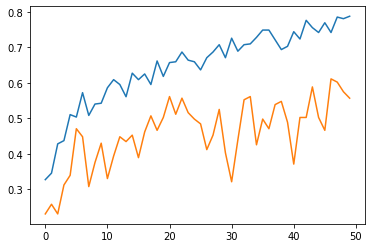

In [113]:
plt.plot(train_acc_hist)
plt.plot(val_acc_hist)
plt.show()

In [ ]:
plt.plot(train_loss_hist)
plt.show()